In [ ]:
# Using r/EDM as a control

from PushshiftDumps.scripts.filter_file import process_file
from datetime import datetime
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
single_field = None
write_bad_lines = True
hyperpop_terms = [
    # General Hyperpop Terms
    "hyperpop", "pc music", "100 gecs", "charli xcx", "sophie", "ag cook",  
    "danny l harle", "ravenna golden", "dorian electra", "glitchcore",  
    "bubblegum bass", "nightcore", "electropop", "experimental pop"

    # Artists & Producers
    "sophie xeon", "sophie oil of every pearl", "danny harlecore",  
    "gfoty", "umru", "caro", "fraxiom", "gupi", "laura les", "dylan brady",  
    "osno1", "ericdoa", "aldn", "midwxst", "underscores", "twikipedia",  "dorian electra"
]

def filter_subreddit(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2019-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "title"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)
    
def filter_comments(input_file, output_file):
    output_format = "csv"
    from_date = datetime.strptime("2018-01-01", "%Y-%m-%d")
    to_date = datetime.strptime("2030-12-31", "%Y-%m-%d")
    field = "body"
    values = hyperpop_terms
    exact_match = False
    return process_file(input_file, output_file, output_format, field, values, from_date, to_date, single_field, exact_match)

In [ ]:
# Filter out r/EDM comments that contain the words related to hyperpop
input_file = "compressed_subreddits/EDM_comments.zst"
output_file = "decompressed_subreddits/hyperpop_filter/EDM_comments"

filter_comments(input_file, output_file)

2025-04-10 23:49:06,572 - INFO: Input: compressed_subreddits/EDM_comments.zst : Output: decompressed_subreddits/hyperpop_filter/EDM_comments.csv : Is submission False
2025-04-10 23:49:07,323 - INFO: 2015-02-24 06:23:19 : 100,000 : 0 : 0 : 30,278,325:17%
2025-04-10 23:49:07,697 - INFO: 2016-07-29 15:41:04 : 200,000 : 0 : 0 : 30,278,325:17%
2025-04-10 23:49:08,308 - INFO: 2017-07-09 07:02:29 : 300,000 : 0 : 0 : 49,415,275:27%
2025-04-10 23:49:08,785 - INFO: 2018-03-26 02:36:47 : 400,000 : 72 : 0 : 49,415,275:27%
2025-04-10 23:49:09,925 - INFO: 2018-10-18 14:37:39 : 500,000 : 192 : 0 : 63,178,150:35%
2025-04-10 23:49:11,019 - INFO: 2019-05-20 20:05:42 : 600,000 : 363 : 0 : 75,499,200:41%
2025-04-10 23:49:12,126 - INFO: 2020-01-30 02:51:08 : 700,000 : 493 : 0 : 87,558,100:48%
2025-04-10 23:49:13,104 - INFO: 2020-12-11 19:40:55 : 800,000 : 645 : 0 : 87,558,100:48%
2025-04-10 23:49:15,433 - INFO: 2021-11-23 15:21:25 : 900,000 : 863 : 0 : 111,413,750:61%
2025-04-10 23:49:16,454 - INFO: 2022-0

In [7]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def load_data(filename):
    """Loads Reddit data from a CSV file."""
    df = pd.read_csv(filename, header=None, names=["post_id", "date", "username", "url", "text"])
    return df

def clean_text(text):
    """Cleans Reddit post text: removes URLs, special characters, and stopwords."""
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

def apply_cleaning(df):
    """Applies text cleaning to the dataframe."""
    df["clean_text"] = df["text"].apply(clean_text)
    return df

def analyze_sentiment_vader(text, analyzer):
    """Analyzes sentiment using VADER and returns the compound score."""
    scores = analyzer.polarity_scores(text)
    return scores["compound"]

def apply_sentiment_analysis(df):
    """Applies sentiment analysis to the dataframe."""
    analyzer = SentimentIntensityAnalyzer()
    df["sentiment_vader"] = df["clean_text"].apply(lambda x: analyze_sentiment_vader(x, analyzer))
    df["sentiment_label"] = df["sentiment_vader"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")
    return df

def save_results(df, output_filename):
    """Saves the processed dataframe to a CSV file."""
    df.to_csv(output_filename, index=False)
    print(f"Results saved to {output_filename}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonbui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Perform sentiment analysis on r/EDM comments
filename = "decompressed_subreddits/hyperpop_filter/EDM_comments.csv" 
output_filename = "sentiments/hyperpop_filter/EDM_comments.csv"

df = load_data(filename)
df = apply_cleaning(df)
df = apply_sentiment_analysis(df)

save_results(df, output_filename)

df.head()

Results saved to sentiments/hyperpop_filter/EDM_comments.csv


,post_id,date,username,url,text,clean_text,sentiment_vader,sentiment_label
0,0,2018-01-01,u/Yartro,https://www.reddit.com/r/EDM/comments/7n9wod/h...,By putting Sophie Francis in that playlist you...,putting sophie francis playlist confirming edm...,-0.5574,negative
1,2,2018-01-01,u/kkarimi786,https://www.reddit.com/r/EDM/comments/7n6x2j/h...,Many were dedicated and would stay for the who...,many dedicated would stay whole set really con...,-0.8781,negative
2,8,2018-01-02,u/Ethan-H212,https://www.reddit.com/r/EDM/comments/7nhq96/d...,I spent my new year on my computer making sure...,spent new year computer making sure got goes a...,0.9836,positive
3,10,2018-01-03,u/sandwichesareevil,https://www.reddit.com/r/EDM/comments/7nvrne/w...,* Tritonal - Call Me (Remixes)\n* Hotel Garuda...,tritonal call remixes hotel garuda feat lemait...,0.7506,positive
4,1,2018-01-05,u/djdanster,https://www.reddit.com/r/EDM/comments/7oa9bj/i...,From memory they distributed Sophie Francis - ...,memory distributed sophie francis love drunk c...,0.2960,positive


/var/folders/01/npnrqpkd1tn3d0zmllp5wtgw0000gn/T/ipykernel_58344/1921753430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=["positive", "neutral", "negative"]),


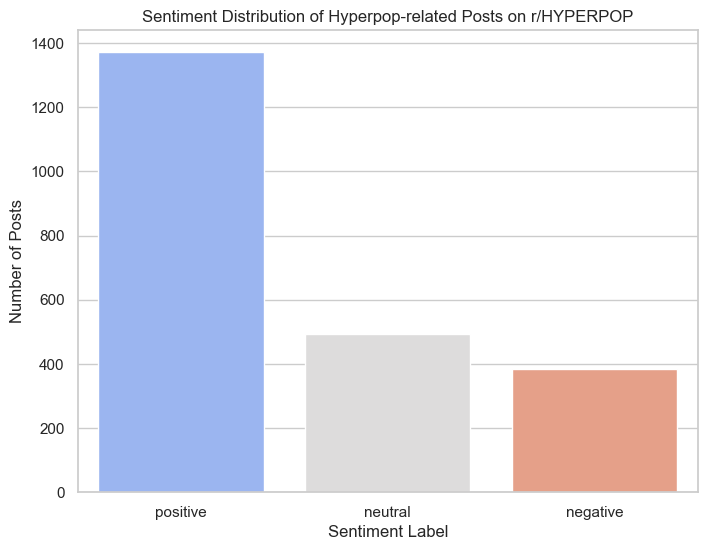

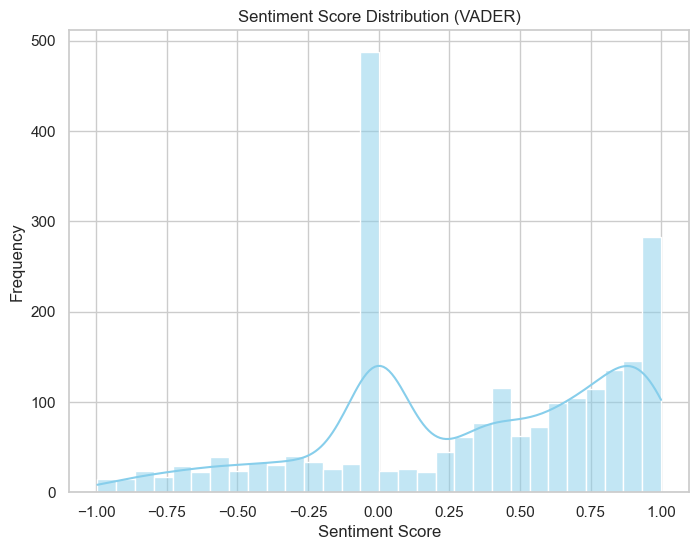

/var/folders/01/npnrqpkd1tn3d0zmllp5wtgw0000gn/T/ipykernel_58344/1921753430.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm")


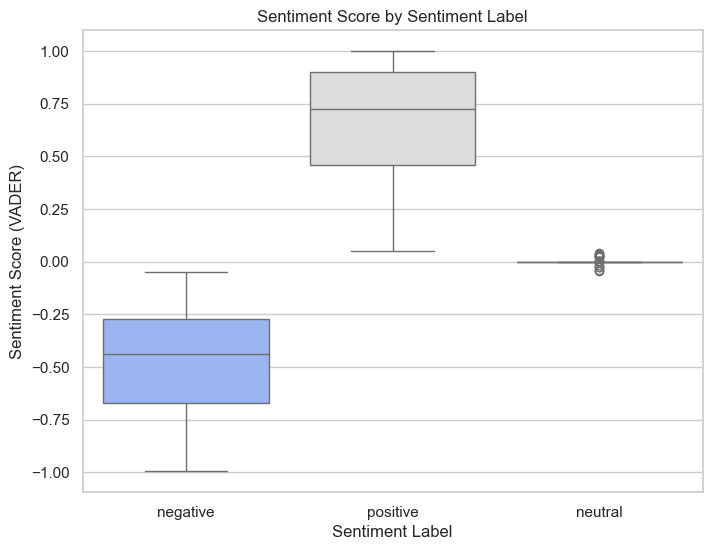

<Figure size 1200x600 with 0 Axes>

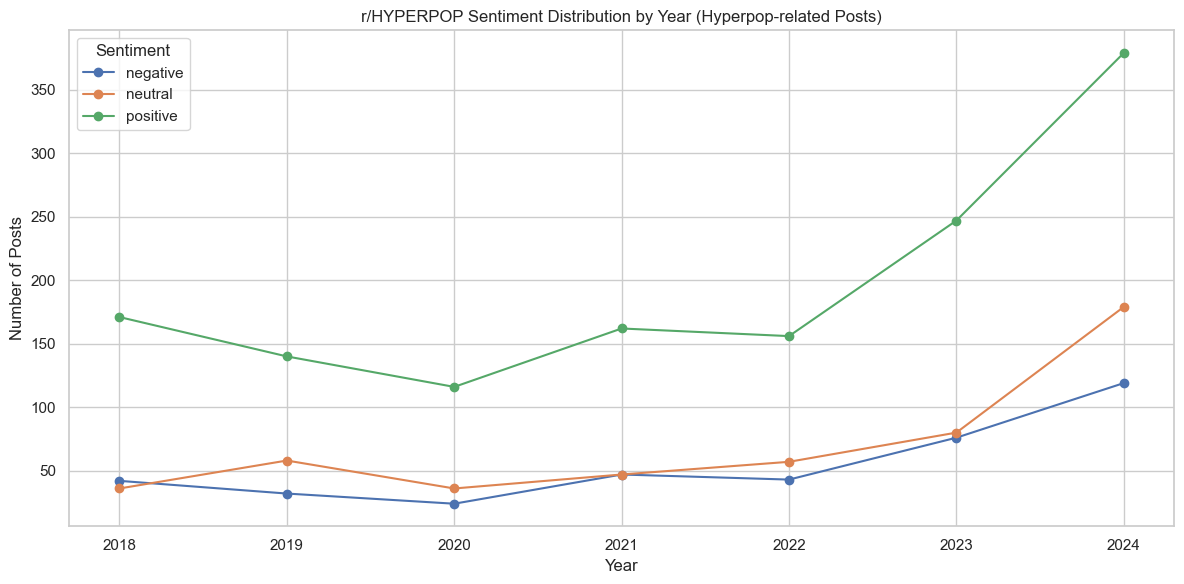

In [ ]:
# Load the processed DataFrame with sentiment analysis results
filename = "sentiments/hyperpop_filter/EDM_comments.csv"
df = pd.read_csv(filename)

# Set up the visual style for Seaborn
sns.set(style="whitegrid")

# Create a count plot for sentiment labels (positive, neutral, negative)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm", order=["positive", "neutral", "negative"]), 
plt.title("Sentiment Distribution of Hyperpop-related Posts on r/HYPERPOP")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Posts")
plt.show()

# Create a distribution plot for sentiment_vader score
plt.figure(figsize=(8, 6))
sns.histplot(df["sentiment_vader"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot to show sentiment_vader score distribution by sentiment label
plt.figure(figsize=(8, 6))
sns.boxplot(x="sentiment_label", y="sentiment_vader", data=df, palette="coolwarm")
plt.title("Sentiment Score by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiment Score (VADER)")
plt.show()

# Plot sentiment distribution by year as a line graph.

# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["date"])

# Extract year
df["year"] = df["date"].dt.year

# Count sentiment per year
sentiment_counts = df.groupby(["year", "sentiment_label"]).size().reset_index(name="count")

# Pivot for line plot
sentiment_pivot = sentiment_counts.pivot_table(index="year", columns="sentiment_label", values="count", aggfunc="sum").fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sentiment_pivot.plot(kind="line", marker="o", linestyle='-', figsize=(12, 6))
plt.title("r/EDM Sentiment Distribution by Year (Hyperpop-related Posts)")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()